In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
## input data
iris = datasets.load_iris()

## check data information
print("size of iris data: ", iris.data.shape)
print(iris.data)
print(iris.target)


size of iris data:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [

In [10]:
## form a Data Frame
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
Y = pd.DataFrame(iris['target'], columns=['target'])
iris = pd.concat([X, Y], axis=1)
print(iris.head())

del X
del Y

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


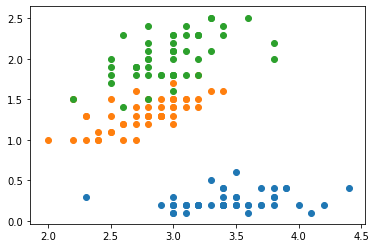

In [11]:
## Observe the relation of sepal/petal width between three iris flowers
class_0 = iris[iris['target']==0]
class_1 = iris[iris['target']==1]
class_2 = iris[iris['target']==2]
plt.scatter(class_0['sepal width (cm)'], class_0['petal width (cm)'], cmap="red")
plt.scatter(class_1['sepal width (cm)'], class_1['petal width (cm)'], cmap="blue")
plt.scatter(class_2['sepal width (cm)'], class_2['petal width (cm)'], cmap="green")
plt.plot()
plt.show()

In [12]:
## Choose class_0 / class_1 to implement PLA 
## Because of linear seperable
data = pd.concat([class_0, class_1], axis=0)
change_name={0 : -1,
             1 : 1}
data['target'] = data['target'].map(change_name)
data = pd.concat([data['sepal width (cm)'], data["petal width (cm)"], data['target']], axis=1)
print(data)

    sepal width (cm)  petal width (cm)  target
0                3.5               0.2      -1
1                3.0               0.2      -1
2                3.2               0.2      -1
3                3.1               0.2      -1
4                3.6               0.2      -1
..               ...               ...     ...
95               3.0               1.2       1
96               2.9               1.3       1
97               2.9               1.3       1
98               2.5               1.1       1
99               2.8               1.3       1

[100 rows x 3 columns]


In [13]:
w = np.ones(3)

data = pd.concat([pd.DataFrame(np.ones(100)), data], axis = 1)
X = np.array(data)[:,0:3]
Y = np.array(data)[:,3]

In [14]:
def sign_activative(x):
    if x > 0:
        return 1
    else:
        return -1
    
def PLA(X, Y, w):
    error = 1
    while error != 0:
        error = 0
        for i in range(len(X)):
            if sign_activative(np.dot(w, X[i])) != Y[i]:
                error = error + 1
                w = w + Y[i] * X[i]
        print("error rate: ", error/100)
        
        a,b = -w[1]/w[2], -w[0]/w[2]
        l = np.linspace(2,4.5)
        plt.plot(l, a*l + b, 'k-')
        plt.scatter(class_0['sepal width (cm)'], class_0['petal width (cm)'], cmap="red")
        plt.scatter(class_1['sepal width (cm)'], class_1['petal width (cm)'], cmap="blue")
        plt.plot()
        plt.show()
    return w

error rate:  0.02


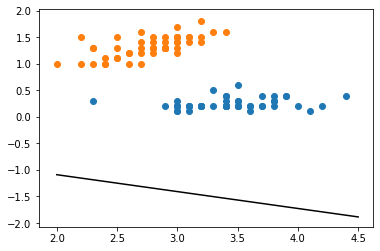

error rate:  0.02


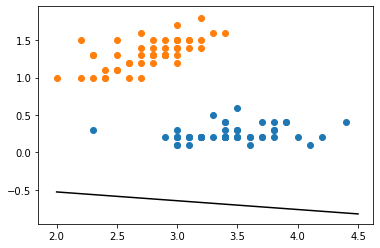

error rate:  0.02


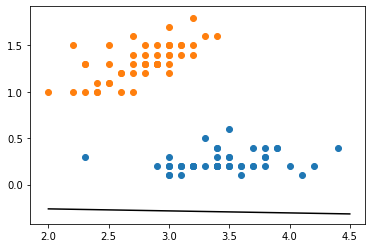

error rate:  0.02


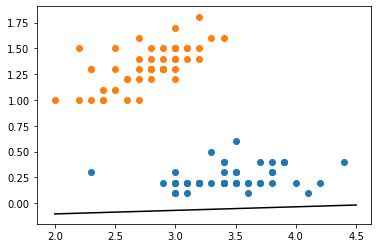

error rate:  0.02


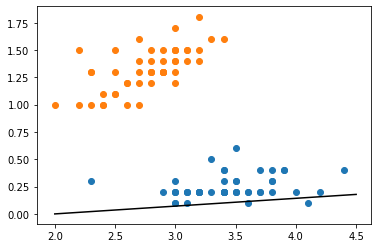

error rate:  0.02


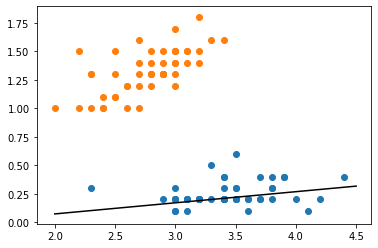

error rate:  0.02


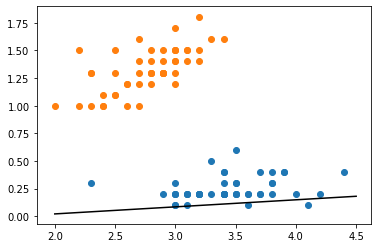

error rate:  0.02


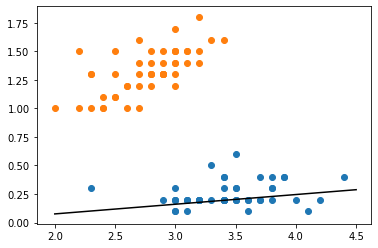

error rate:  0.02


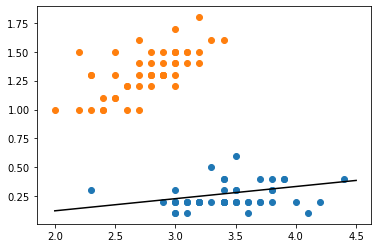

error rate:  0.02


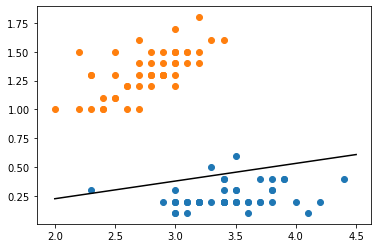

error rate:  0.02


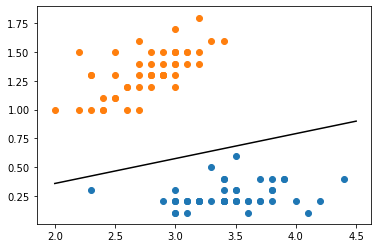

error rate:  0.0


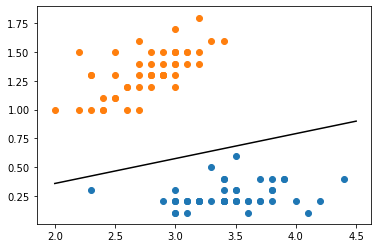

[ 1.  -2.8 12.9]


In [15]:
w = PLA(X, Y, w)
print(w)

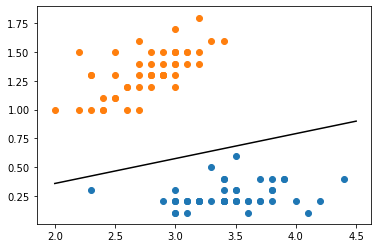

In [16]:
a,b = -w[1]/w[2], -w[0]/w[2]
l = np.linspace(2,4.5)
plt.plot(l, a*l + b, 'k-')
plt.scatter(class_0['sepal width (cm)'], class_0['petal width (cm)'], cmap="red")
plt.scatter(class_1['sepal width (cm)'], class_1['petal width (cm)'], cmap="blue")
plt.plot()
plt.show()